In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1384


<Axes: xlabel='Time'>

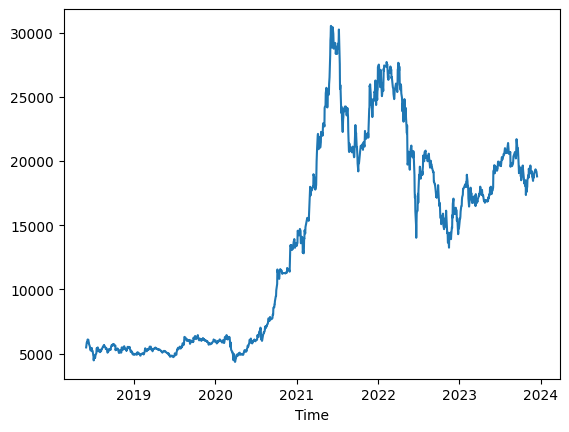

In [3]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [7]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,5480
1,5880
2,5900
3,5880
4,6060
...,...
1379,19200
1380,19200
1381,19050


In [8]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(VIB))
test_size = int(0.2 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [9]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[24609.46910095],
       [24630.94330563],
       [24652.4175103 ],
       [24673.89171498],
       [24695.36591965],
       [24716.84012433],
       [24738.314329  ],
       [24759.78853368],
       [24781.26273835],
       [24802.73694303],
       [24824.21114771],
       [24845.68535238],
       [24867.15955706],
       [24888.63376173],
       [24910.10796641],
       [24931.58217108],
       [24953.05637576],
       [24974.53058043],
       [24996.00478511],
       [25017.47898978],
       [25038.95319446],
       [25060.42739913],
       [25081.90160381],
       [25103.37580848],
       [25124.85001316],
       [25146.32421783],
       [25167.79842251],
       [25189.27262718],
       [25210.74683186],
       [25232.22103653],
       [25253.69524121],
       [25275.16944588],
       [25296.64365056],
       [25318.11785523],
       [25339.59205991],
       [25361.06626458],
       [25382.54046926],
       [25404.01467393],
       [25425.48887861],
       [25446.96308328],


In [12]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[30557.82379597]
 [30579.29800064]
 [30600.77220532]
 [30622.24640999]
 [30643.72061467]
 [30665.19481934]
 [30686.66902402]
 [30708.14322869]
 [30729.61743337]
 [30751.09163804]
 [30772.56584272]
 [30794.04004739]
 [30815.51425207]
 [30836.98845674]
 [30858.46266142]
 [30879.93686609]
 [30901.41107077]
 [30922.88527544]
 [30944.35948012]
 [30965.83368479]
 [30987.30788947]
 [31008.78209414]
 [31030.25629882]
 [31051.73050349]
 [31073.20470817]
 [31094.67891284]
 [31116.15311752]
 [31137.62732219]
 [31159.10152687]
 [31180.57573154]
 [31202.04993622]
 [31223.52414089]
 [31244.99834557]
 [31266.47255024]
 [31287.94675492]
 [31309.4209596 ]
 [31330.89516427]
 [31352.36936895]
 [31373.84357362]
 [31395.3177783 ]
 [31416.79198297]
 [31438.26618765]
 [31459.74039232]
 [31481.214597  ]
 [31502.68880167]
 [31524.16300635]
 [31545.63721102]
 [31567.1114157 ]
 [31588.58562037]
 [31610.05982505]
 [31631.53402972]
 [31653.0082344 ]
 [31674.48243907]

In [13]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 9493.097329111239
Testing MAPE: 52.697908317930754
Testing MAE: 9413.486963450609


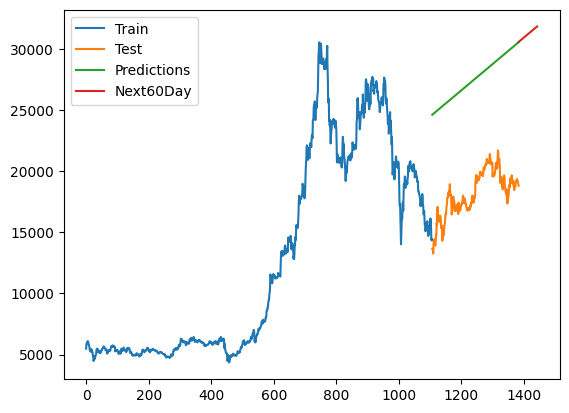

In [14]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()